## Day 13 || End to end Toy Project


In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.info() # here in pandas into give detail about out data like it has null value or not answer some other information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [5]:
df = df.iloc[:,1:] #in pandas this is used to remove some of the information so i need to study about it

In [6]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


### ==== Steps to do in this video ===

### 0. Preprocesses + EDA(Exporatory data analysis)+ Features Selection
### 1. Extract input and output cols
### 2. Scale the valus 
### 3. Train test split
### 4. Train the model
### 5. Evaluate the model/model selection
### 6. Deploy the model

In [7]:
import matplotlib.pyplot as plt

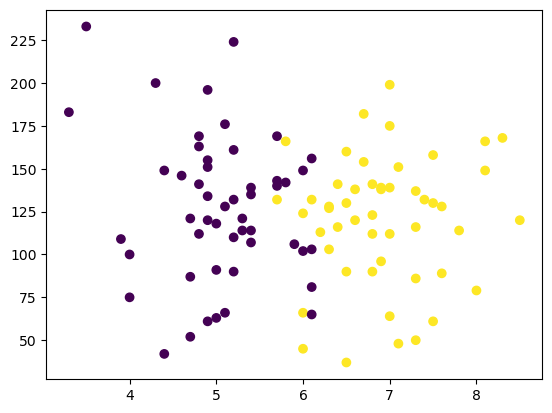

In [8]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement']) #Blue does not got placement

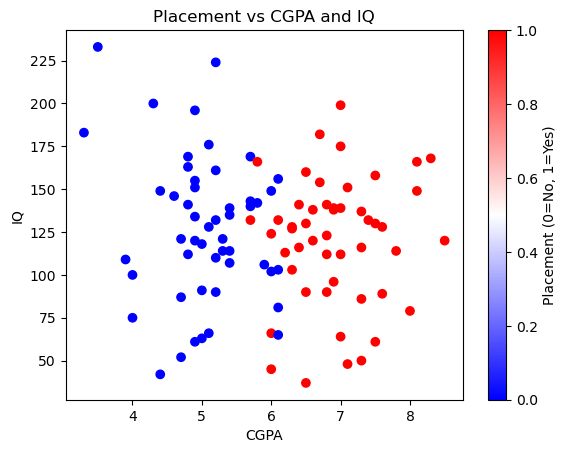

In [9]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'], cmap='bwr')  # bwr: blue-white-red
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.title('Placement vs CGPA and IQ')
plt.colorbar(label='Placement (0=No, 1=Yes)')
plt.show()


In [10]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

In [12]:
x_train

,cgpa,iq
34,4.8,163.0
15,5.1,176.0
44,7.5,61.0
87,5.7,132.0
88,4.4,149.0
...,...,...
26,7.0,199.0
70,6.3,127.0
60,6.9,139.0
96,4.4,42.0


In [13]:
y_train

34    0
15    0
44    1
87    1
88    0
     ..
26    1
70    1
60    1
96    0
65    1
Name: placement, Length: 90, dtype: int64

When working with machine learning models, it's important to ensure that all input features are on the same scale so that no single feature dominates the learning process due to larger numerical values. This is where StandardScaler from Scikit-learn comes in—it standardizes your data by transforming each feature so that it has a mean of 0 and a standard deviation of 1. This process is called standardization and is done using the formula: (value - mean) / standard deviation. For example, if your dataset includes features like CGPA (ranging from 0–10) and IQ (ranging from 70–150), these are on very different scales. Without standardization, the model might give too much importance to IQ just because of its larger numbers. By applying Scaler.fit_transform(x_train), you're making sure that each feature contributes equally to the model by converting all features to a common scale. This is especially crucial for algorithms like logistic regression, SVM, KNN, neural networks, and PCA, which are sensitive to differences in feature scales. Standardizing ensures more accurate, stable, and faster model training.

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
Scaler = StandardScaler()

In [16]:
x_train = Scaler.fit_transform(x_train)

In [17]:
x_train

array([[-1.08857826,  0.99653107],
       [-0.815422  ,  1.31763858],
       [ 1.36982803, -1.52292782],
       [-0.26910949,  0.23081317],
       [-1.45278659,  0.65072299],
       [ 0.09509884,  0.23081317],
       [ 0.55035927, -0.06559376],
       [ 1.18772386,  0.35431606],
       [-0.99752617,  0.28021433],
       [ 0.00404676,  0.65072299],
       [-0.54226575,  0.40371721],
       [-0.90647409, -1.47352666],
       [-0.54226575, -0.21379722],
       [-0.26910949,  0.42841779],
       [-0.90647409, -0.7819105 ],
       [-1.08857826,  0.45311837],
       [ 0.09509884,  0.82362703],
       [ 0.09509884, -1.02891627],
       [ 0.91456761,  1.292938  ],
       [ 0.91456761, -0.26319837],
       [ 1.00561969, -1.84403533],
       [-0.54226575,  0.3049149 ],
       [-1.81699493, -0.5596053 ],
       [ 0.82351552,  0.37901664],
       [ 0.00404676, -1.91813706],
       [ 0.45930718, -0.80661108],
       [-0.72436992,  0.23081317],
       [ 0.64141135,  1.46584204],
       [ 0.64141135,

In [18]:
x_test = Scaler.transform(x_test)

In [19]:
x_test

array([[ 1.46088011, -0.83131165],
       [-0.54226575, -0.38670126],
       [-0.99752617, -0.06559376],
       [-1.54383868,  1.91045243],
       [-1.90804702, -0.33730011],
       [-0.90647409, -0.11499491],
       [-0.17805741,  1.0706328 ],
       [ 1.00561969,  0.70012414],
       [ 2.28034888, -0.06559376],
       [ 0.91456761,  0.40371721]])

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
clf = LogisticRegression()

In [22]:
#model training 
clf.fit(x_train,y_train)

LogisticRegression()

In [23]:
y_pred = clf.predict(x_test)

In [24]:
y_test

42    1
81    0
22    0
95    0
31    0
67    0
85    1
21    1
69    1
32    1
Name: placement, dtype: int64

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
accuracy_score(y_test,y_pred)

0.9

In [27]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [28]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

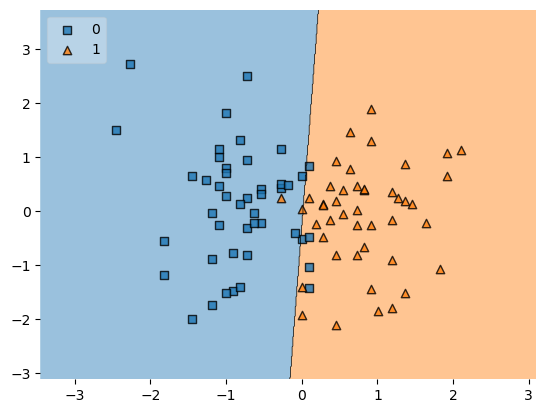

In [29]:
plot_decision_regions(x_train,y_train.values, clf=clf , legend=2)

In [30]:
import pickle

In [31]:
pickle.dump(clf,open('model.pkl','wb'))

## Day 15 || Working With CSV files

### 1. URL Way To Get Data

In [32]:
import requests
import pandas as pd
from io import StringIO

# 🔗 Provide a valid CSV URL here
url = "https://people.sc.fsu.edu/~jburkardt/data/csv/airtravel.csv"

# 🧠 Set headers (optional but good for compatibility)
headers = {
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:66.0) Gecko/20100101 Firefox/66.0"
}

# 📥 Send GET request
req = requests.get(url, headers=headers)

# 📄 Convert response text to a file-like object
data = StringIO(req.text)

# 📊 Read CSV data into a DataFrame
df = pd.read_csv(data)

# ✅ Show result
print(df.head())


  Month   "1958"   "1959"   "1960"
0   JAN      340      360      417
1   FEB      318      342      391
2   MAR      362      406      419
3   APR      348      396      461
4   MAY      363      420      472


### 2. Sep Parameter

In the sep parameter first data is load as usual in the csv mode but data may not in the right formate so it leads to separate the using [sep='\t'] and we can change the heading also with the help of names=[]

In [33]:
#pd.read_csv('movie_titles_metadata.tsv', sep='\t',names=['sno','name','release_year','rating','votes','genres'])

In [35]:

pd.read_csv('movie_titles_metadata.tsv',sep='\t',names=['sno','name','release_year','rating','votes','genres'])

,sno,name,release_year,rating,votes,genres
0,m0,10 things i hate about you,1999,6.9,62847.0,['comedy' 'romance']
1,m1,1492: conquest of paradise,1992,6.2,10421.0,['adventure' 'biography' 'drama' 'history']
2,m2,15 minutes,2001,6.1,25854.0,['action' 'crime' 'drama' 'thriller']
3,m3,2001: a space odyssey,1968,8.4,163227.0,['adventure' 'mystery' 'sci-fi']
4,m4,48 hrs.,1982,6.9,22289.0,['action' 'comedy' 'crime' 'drama' 'thriller']
...,...,...,...,...,...,...
612,m612,watchmen,2009,7.8,135229.0,['action' 'crime' 'fantasy' 'mystery' 'sci-fi'...
613,m613,xxx,2002,5.6,53505.0,['action' 'adventure' 'crime']
614,m614,x-men,2000,7.4,122149.0,['action' 'sci-fi']
615,m615,young frankenstein,1974,8.0,57618.0,['comedy' 'sci-fi']


### 3. Index_col parameter

#some time we want no serial number instead of that appoint new column as act as serial number then we use index_col

In [37]:
pd.read_csv('aug_train.csv',index_col='enrollee_id') 

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
enrollee_id,,,,,,,,,,,,,
8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0


### 4. Header parameter

#some time header become the inside the column so to make header we use header = 1

In [42]:
pd.read_csv('test.csv',header = 1) 

,0,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
1,2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0
2,3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1
3,4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0


### 5. use_cols parameter

some time we want specific column during import of data then we can use this to import exact column from a file it save time and space also

In [44]:
pd.read_csv('aug_train.csv',usecols = ['enrollee_id','gender','education_level']) 

,enrollee_id,gender,education_level
0,8949,Male,Graduate
1,29725,Male,Graduate
2,11561,NaN,Graduate
3,33241,NaN,Graduate
4,666,Male,Masters
...,...,...,...
19153,7386,Male,Graduate
19154,31398,Male,Graduate
19155,24576,Male,Graduate
19156,5756,Male,High School


### 6. Squeeze parameters

**squeeze** parameter is deprecated and has been removed in recent versions of pandas (v2.0+).

In [48]:
# Read the column as a DataFrame
df = pd.read_csv('aug_train.csv', usecols=['enrollee_id'])

# Convert to Series (if needed)
enrollee_id = df['enrollee_id']


In [49]:
enrollee_id = pd.read_csv('aug_train.csv', usecols=['enrollee_id'])['enrollee_id']


❌ df.show() → Incorrect for pandas
1. To preview the first few rows:
df.head()
2. To view the entire DataFrame (small data only)
print(df)
3. To see last few rows:
df.tail()                       

In [52]:
print(df)

       enrollee_id
0             8949
1            29725
2            11561
3            33241
4              666
...            ...
19153         7386
19154        31398
19155        24576
19156         5756
19157        23834

[19158 rows x 1 columns]


### 7. Skiprows/nrows Parameter

=====    this is basically used for remove the specific rows from the table we can apply the loop or some logic to remove the multiple the rows so it is useful when we have to skip multiple rows and column

In [53]:
pd.read_csv('aug_train.csv',skiprows=[0,5])

,8949,city_103,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,Unnamed: 9,Unnamed: 10,1,36,1.0
0,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
1,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
2,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
3,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1.0
4,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,5,50-99,Funded Startup,1,24,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19151,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19152,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19153,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19154,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


=====       so nrows is basically use when we want limited number of rows and column 

In [55]:
pd.read_csv('aug_train.csv',nrows=100)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,12081,city_65,0.802,Male,Has relevent experience,Full time course,Graduate,STEM,9,50-99,Pvt Ltd,1,33,0.0
96,7364,city_160,0.920,NaN,No relevent experience,Full time course,High School,NaN,2,100-500,Pvt Ltd,1,142,0.0
97,11184,city_74,0.579,NaN,No relevent experience,Full time course,Graduate,STEM,2,100-500,Pvt Ltd,1,34,0.0
98,7016,city_65,0.802,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Pvt Ltd,2,14,1.0


### 8. Encoding parameter

✅ What is encoding?
The encoding parameter tells Python how to interpret the bytes in your file as readable characters (like letters, symbols, punctuation).
Different files may use different encodings — common ones include UTF-8, ISO-8859-1, cp1252, etc.

🧠 Why is it important?
If you try to read a file with the wrong encoding, you'll often get errors like:
UnicodeDecodeError
Weird or broken characters (e.g., Ã, Â, �)
Setting the right encoding helps you correctly load the file into pandas.

In [60]:
pd.read_csv('zomato.csv',encoding='latin-1') #if i am not going to write that formula then is normally show error but it is solvable

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


### 9. Skip bad lines

pd.read_csv('BX-Books.csv', sep=';',encoding="latin-1",error_bad_lines=False)
error_bad_lines. This parameter was removed in pandas version 1.3.0 and above.
If you're not sure why you're getting bad lines, you can try:

on_bad_lines='warn'
This will show a warning instead of skipping silently.

In [63]:
#pd.read_csv('BX-Books.csv', sep=';', encoding="latin-1", on_bad_lines='skip')
# it is not work because the file or directory not found

### 10. dtypes parameter

it is use as converter of data type from one type to another or just give me info what types of data is store in the rows or column

In [66]:
pd.read_csv('aug_train.csv',dtype={'target':int}).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

### 11. Handling Dates

when we are uploading dataset which have date in the column it act as string [but when you type .info then it show object because in pandas string act as object] so to solve that we use handling dates to convert into date

In [69]:
pd.read_csv('IPL Matches 2008-2020.csv',parse_dates=['date']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               816 non-null    int64         
 1   city             803 non-null    object        
 2   date             816 non-null    datetime64[ns]
 3   player_of_match  812 non-null    object        
 4   venue            816 non-null    object        
 5   neutral_venue    816 non-null    int64         
 6   team1            816 non-null    object        
 7   team2            816 non-null    object        
 8   toss_winner      816 non-null    object        
 9   toss_decision    816 non-null    object        
 10  winner           812 non-null    object        
 11  result           812 non-null    object        
 12  result_margin    799 non-null    float64       
 13  eliminator       812 non-null    object        
 14  method           19 non-null     object   

### 12. Convertors

convertors is use to convert max letter into smaller and make it easy to read by user and help many other way when country need short form and other also

In [77]:
def rename(name):
    if name == "Royal Challengers Bangalore":
        return "RCB"
    else:
        return name       

In [78]:
pd.read_csv('IPL Matches 2008-2020.csv', converters={'team1': rename})


,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,RCB,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,RCB,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,RCB,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi


In [79]:
team_map = {
    "Royal Challengers Bangalore": "RCB",
    "Delhi Daredevils": "DC",
    "Kings XI Punjab": "PBKS"
}

def rename(name):
    return team_map.get(name, name)


In [81]:
pd.read_csv('IPL Matches 2008-2020.csv', converters={'team1': rename, 'team2': rename})

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,RCB,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,PBKS,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,DC,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,RCB,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,RCB,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,RCB,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi


### 13. na_values parameter

na_values is used when some time column has none value in different form [e:g. '-','0' etc] then we need to convert into understandable format so that we can figure out which value is empty and which have proper value

In [82]:
pd.read_csv('aug_train.csv',na_values=['Male',])

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,NaN,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,NaN,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,NaN,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,NaN,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


### 14. Loading a huge dataset in chunks

In [84]:
dfs = pd.read_csv('aug_train.csv',chunksize=5000)

In [86]:
for chunks in dfs:
    print(chunks.shape)

(5000, 14)
(5000, 14)
(4158, 14)


## Day 16 || Working With JSON/SQL

JSON is important when working with APIs because it is a lightweight and language-independent data format that is easy to read, write, and parse in many programming languages like Java, Python, JavaScript, etc.

Why JSON is Widely Used in APIs:
Language-Independent, but Language-Friendly:
Lightweight:
Structured Yet Simple: [Can represent complex data structures (arrays, nested objects) while keeping a clean format.]
Standard Format for REST APIs:
[Most modern web APIs (especially RESTful APIs) use JSON as the default format to exchange data between client and server.]


In [1]:
import pandas as pd

In [2]:
pd.read_json('train.json')

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."
...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ..."
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b..."
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte..."
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli..."


In [3]:
pd.read_json('https://api.exchangerate-api.com/v4/latest/INR')

,provider,WARNING_UPGRADE_TO_V6,terms,base,date,time_last_updated,rates
INR,https://www.exchangerate-api.com,https://www.exchangerate-api.com/docs/free,https://www.exchangerate-api.com/terms,INR,2025-07-31,1753920002,1.0000
AED,https://www.exchangerate-api.com,https://www.exchangerate-api.com/docs/free,https://www.exchangerate-api.com/terms,INR,2025-07-31,1753920002,0.0419
AFN,https://www.exchangerate-api.com,https://www.exchangerate-api.com/docs/free,https://www.exchangerate-api.com/terms,INR,2025-07-31,1753920002,0.7880
ALL,https://www.exchangerate-api.com,https://www.exchangerate-api.com/docs/free,https://www.exchangerate-api.com/terms,INR,2025-07-31,1753920002,0.9670
AMD,https://www.exchangerate-api.com,https://www.exchangerate-api.com/docs/free,https://www.exchangerate-api.com/terms,INR,2025-07-31,1753920002,4.4000
...,...,...,...,...,...,...,...
XPF,https://www.exchangerate-api.com,https://www.exchangerate-api.com/docs/free,https://www.exchangerate-api.com/terms,INR,2025-07-31,1753920002,1.1900
YER,https://www.exchangerate-api.com,https://www.exchangerate-api.com/docs/free,https://www.exchangerate-api.com/terms,INR,2025-07-31,1753920002,2.7600
ZAR,https://www.exchangerate-api.com,https://www.exchangerate-api.com/docs/free,https://www.exchangerate-api.com/terms,INR,2025-07-31,1753920002,0.2050
ZMW,https://www.exchangerate-api.com,https://www.exchangerate-api.com/docs/free,https://www.exchangerate-api.com/terms,INR,2025-07-31,1753920002,0.2630


### working with SQL

In [4]:
!pip install mysql.connector

     ---------------------------------------- 0.0/11.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/11.9 MB ? eta -:--:--
      --------------------------------------- 0.3/11.9 MB ? eta -:--:--
     - -------------------------------------- 0.5/11.9 MB 2.4 MB/s eta 0:00:05
     --- ------------------------------------ 1.0/11.9 MB 2.1 MB/s eta 0:00:06
     ----- ---------------------------------- 1.6/11.9 MB 2.0 MB/s eta 0:00:06
     ------ --------------------------------- 1.8/11.9 MB 2.1 MB/s eta 0:00:05
     ------- -------------------------------- 2.1/11.9 MB 2.0 MB/s eta 0:00:05
     --------- ------------------------------ 2.9/11.9 MB 2.1 MB/s eta 0:00:05
     ----------- ---------------------------- 3.4/11.9 MB 2.2 MB/s eta 0:00:04
     ------------- -------------------------- 3.9/11.9 MB 2.3 MB/s eta 0:00:04
     --------------- ------------------------ 4.5/11.9 MB 2.3 MB/s eta 0:00:04
     ---------------- ----------------------- 5.0/11.9 MB 2.4 MB/s eta 0:

  DEPRECATION: Building 'mysql.connector' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'mysql.connector'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [5]:
import mysql.connector

In [8]:
conn = mysql.connector.connect(host='localhost',user='root',password='',database='world')

In [10]:
pd.read_sql_query("SELECT * from city where CountryCode LIKE 'IND'",conn)

C:\Users\Prashant Mishra\AppData\Local\Temp\ipykernel_1604\4160406476.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query("SELECT * from city where CountryCode LIKE 'IND'",conn)


,ID,Name,CountryCode,District,Population
0,1024,Mumbai (Bombay),IND,Maharashtra,10500000
1,1025,Delhi,IND,Delhi,7206704
2,1026,Calcutta [Kolkata],IND,West Bengali,4399819
3,1027,Chennai (Madras),IND,Tamil Nadu,3841396
4,1028,Hyderabad,IND,Andhra Pradesh,2964638
...,...,...,...,...,...
336,1360,Ambala Sadar,IND,Haryana,90712
337,1361,Baidyabati,IND,West Bengali,90601
338,1362,Morvi,IND,Gujarat,90357
339,1363,Raigarh,IND,Chhatisgarh,89166


## Day 17 || Featching Data From an API 

what is API 
API stand for Application programming interface it hold communication between two software or Data Pipeline between two point

In [ ]:
import pandas as pd
import requests

In [1]:
response = requests.get('https://api.themoviedb.org/3/movie/top_rated?api_key=8625bd1679663a7ea12ac168da84d2e8&language=en-US&page=1')

NameError: name 'requests' is not defined

## Day 18 || Featching Data using web scrapping

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup #BeautifulSoup is library use for webscrapping 

### if response code is 403

<Response[403]> it means server reject your access just like when sometime traffic ahead on any network so to remove let check what is in have in the text form

In [3]:
webpage = requests.get('https://www.adobe.com/in/products/aftereffects.html')

In [ ]:
response = requests.get('https://www.adobe.com/in/products/aftereffects.html', headers=headers)
soup = BeautifulSoup(response.text, 'lxml')  # or response.content
